In [13]:
import epiabm as ce
import os
print(os.getcwd())
print(os.path.abspath('../../pyEpiabm'))

import sys
sys.path.append(os.path.abspath('../../pyEpiabm'))
import pyEpiabm as pe
import numpy as np
import pandas as pd

from plotnine import *

/home/sabsr3/epiabm/python_examples/cEpiabm_example
/home/sabsr3/epiabm/pyEpiabm


In [14]:
c_cfg = ce.JsonFactory().load_config("parameters.json")

pe.Parameters.set_file("python_parameters.json")
p_cfg = pe.Parameters.instance()


WARNING [2022/04/28 18:00:01]: Unable to retrieve parameter "random_seed", using default value.

In [15]:
c_latentICDF = c_cfg.infection_config.host_progression_config.latent_period_icdf

p_hostProgressionSweep = pe.sweep.HostProgressionSweep()
p_latentICDF = p_hostProgressionSweep.transition_time_matrix.InfectASympt.Exposed


In [16]:
latent_sample = pd.DataFrame(columns=['python', 'cpp'])
for i in range(10000):
    latent_sample = latent_sample.append(
        {'python': p_latentICDF.icdf_choose_exp(),
        'cpp': c_latentICDF.choose(1, c_cfg.random_manager.generator())},
        ignore_index=True
    )

In [33]:
counts = pd.DataFrame({'python': latent_sample['python'].value_counts(),
    'cpp': latent_sample['cpp'].value_counts()})
counts['x'] = counts.index

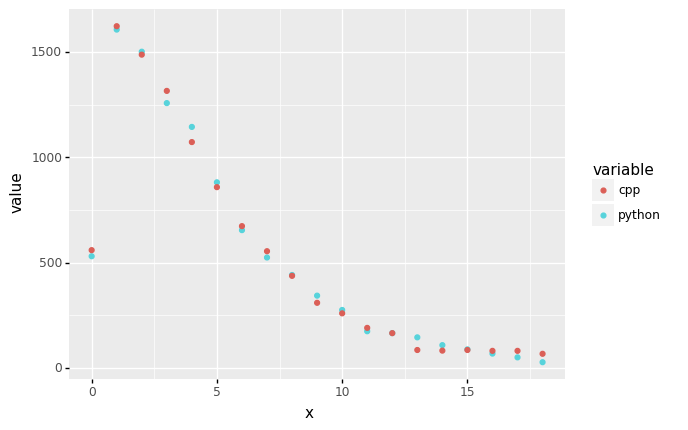

<ggplot: (8751830043432)>

In [39]:
(
    ggplot(counts.melt('x'), aes(x='x', y='value', colour='variable')) +
    geom_point()
)